In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
iris = data.loc[:, 'SepalLengthCm':'PetalWidthCm']

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


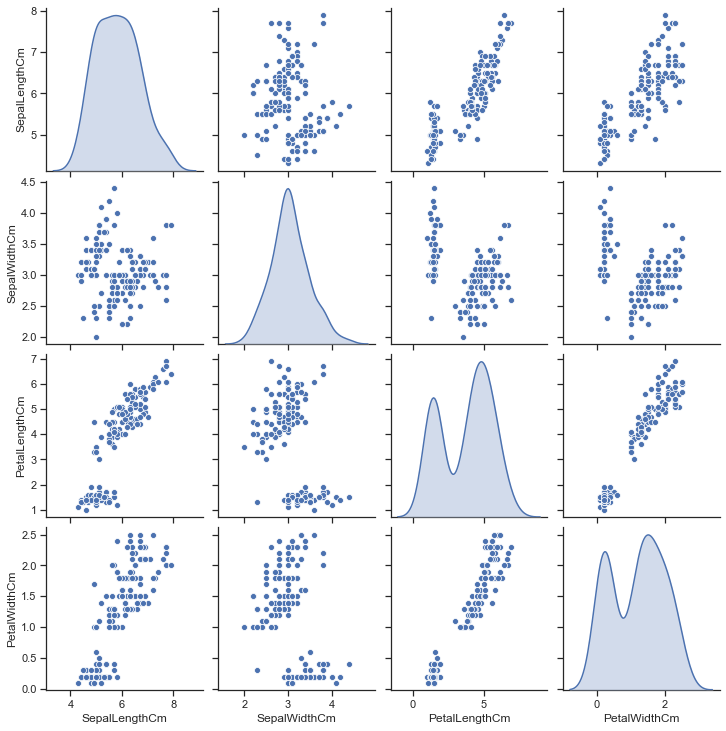

In [8]:
import seaborn as sns
sns.pairplot(iris,diag_kind='kde')

In [9]:
data['Species']=data['Species'].map({
    "Iris-virginica":1,
    "Iris-versicolor":2,
    "Iris-setosa":3
    
})

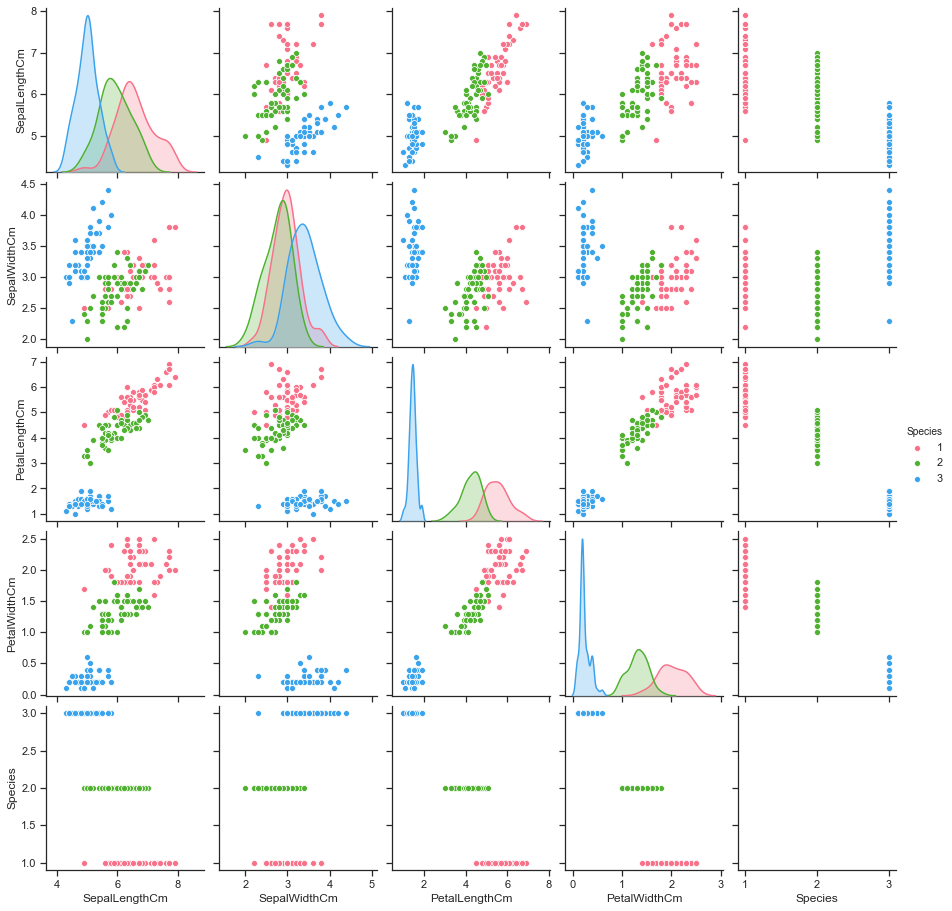

In [10]:
sns.pairplot(data, vars =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] ,hue='Species', palette='husl')
plt.show()

In [12]:
g_seto=data[data['Species']==3]
g_seto.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,50.00000,50.00000,50.000000,50.000000,50.00000,50.0
mean,25.50000,5.00600,3.418000,1.464000,0.24400,3.0
std,14.57738,0.35249,0.381024,0.173511,0.10721,0.0
min,1.00000,4.30000,2.300000,1.000000,0.10000,3.0
25%,13.25000,4.80000,3.125000,1.400000,0.20000,3.0
50%,25.50000,5.00000,3.400000,1.500000,0.20000,3.0
75%,37.75000,5.20000,3.675000,1.575000,0.30000,3.0
max,50.00000,5.80000,4.400000,1.900000,0.60000,3.0


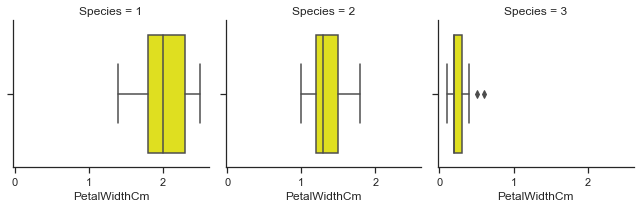

In [15]:
a = sns.FacetGrid(data, col='Species')
a.map(sns.boxplot, 'PetalWidthCm', color='yellow')

In [16]:
df_scaled = iris.apply(zscore)

In [17]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [18]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.615507
4,5,91.111019
5,6,80.166277
6,7,71.986145
7,8,62.641008
8,9,54.343737
9,10,47.572395


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

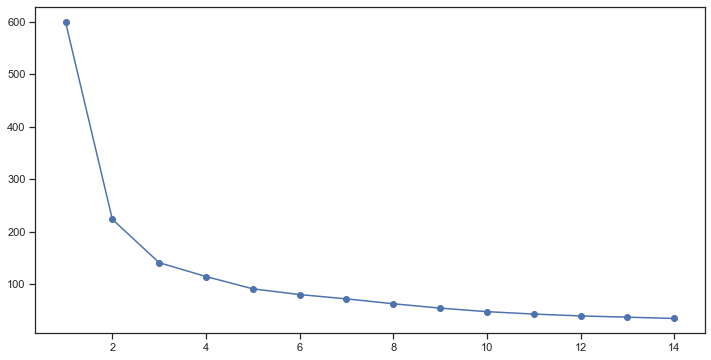

In [19]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [20]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [21]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [22]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [24]:
df_scaled['Species']=kmeans.labels_

In [25]:
c0=centroids[0,:]
c0

array([-0.05021989, -0.88029181,  0.34753171,  0.28206327])

In [26]:
g0=df_scaled[df_scaled['class']==0]
g0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class,Species
53,-0.416010,-1.744778,0.137236,0.133226,0,0
54,0.795669,-0.587764,0.478430,0.396172,0,0
55,-0.173674,-0.587764,0.421564,0.133226,0,0
57,-1.143017,-1.513375,-0.260824,-0.261193,0,0
58,0.916837,-0.356361,0.478430,0.133226,0,0


In [27]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [28]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [29]:
iris_df_labeled['labels'].value_counts()

0    53
1    50
2    47
Name: labels, dtype: int64

In [30]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

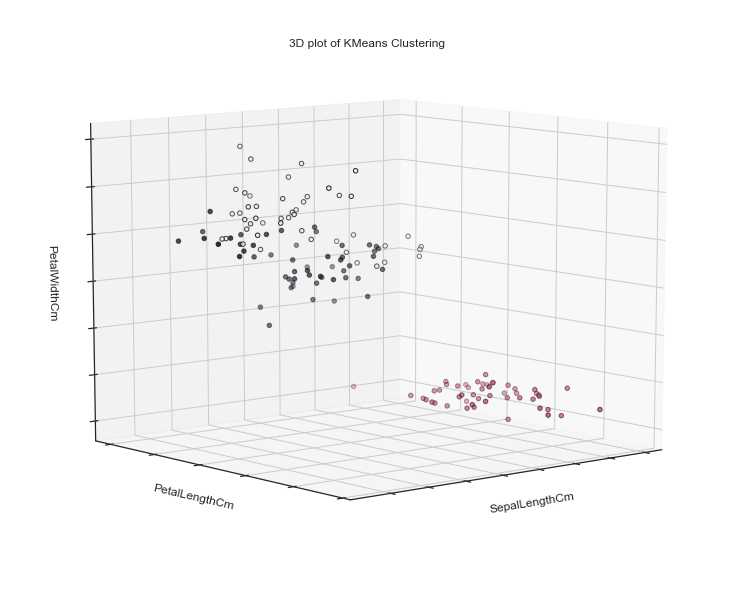

In [33]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)
#kmeans.fit(df_scaled)
L = kmeans.labels_
ax.scatter(data.iloc[:, 0], data.iloc[:, 2], data.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')
ax.set_title('3D plot of KMeans Clustering')

In [34]:
iris_clusters = iris_df_labeled.groupby(['labels'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)

In [35]:
df0.shape,df1.shape,df2.shape

((53, 7), (50, 7), (47, 7))

In [36]:
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,class,Species,labels
53,-0.416010,-1.744778,0.137236,0.133226,0,0,0
54,0.795669,-0.587764,0.478430,0.396172,0,0,0
55,-0.173674,-0.587764,0.421564,0.133226,0,0,0
57,-1.143017,-1.513375,-0.260824,-0.261193,0,0,0
58,0.916837,-0.356361,0.478430,0.133226,0,0,0


In [37]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [39]:
from sklearn.cluster import AgglomerativeClustering 
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model2.fit(df_scaled)
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

1    53
0    50
2    47
Name: 0, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

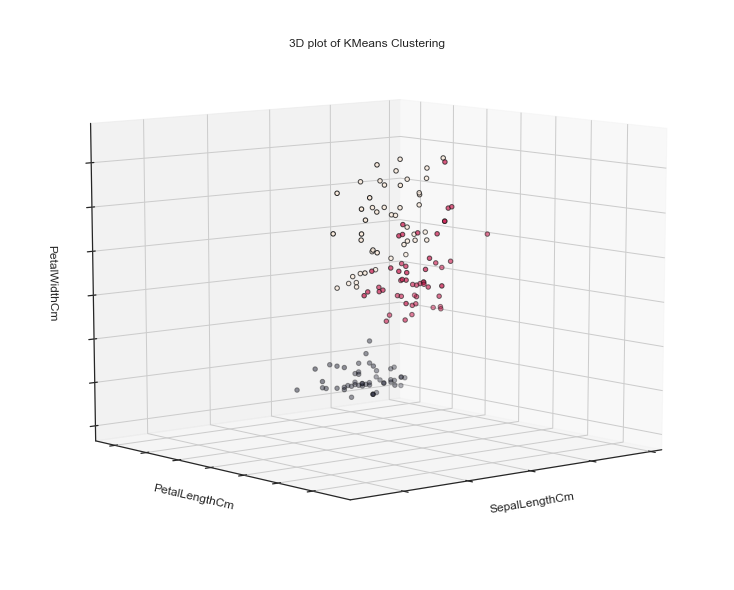

In [40]:
#Results of AGC
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=50)
#kmeans.fit(df_scaled)
L = model2.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2], df_scaled.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')
ax.set_title('3D plot of KMeans Clustering')

In [41]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [42]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_AGC_labeled = df_scaled.join(AGC_labels)

In [43]:
AGC_clusters = iris_AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [44]:
(Df0.shape,Df1.shape,Df2.shape)

((50, 7), (53, 7), (47, 7))

In [48]:
C0=np.array([Df0['SepalLengthCm'].mean(),Df0['SepalWidthCm'].mean(),Df0['PetalLengthCm'].mean(),Df0['PetalWidthCm'].mean()])
C1=np.array([Df1['SepalLengthCm'].mean(),Df1['SepalWidthCm'].mean(),Df1['PetalLengthCm'].mean(),Df1['PetalWidthCm'].mean()])
C2=np.array([Df2['SepalLengthCm'].mean(),Df2['SepalWidthCm'].mean(),Df2['PetalLengthCm'].mean(),Df2['PetalWidthCm'].mean()])


In [49]:
from scipy.spatial.distance import pdist

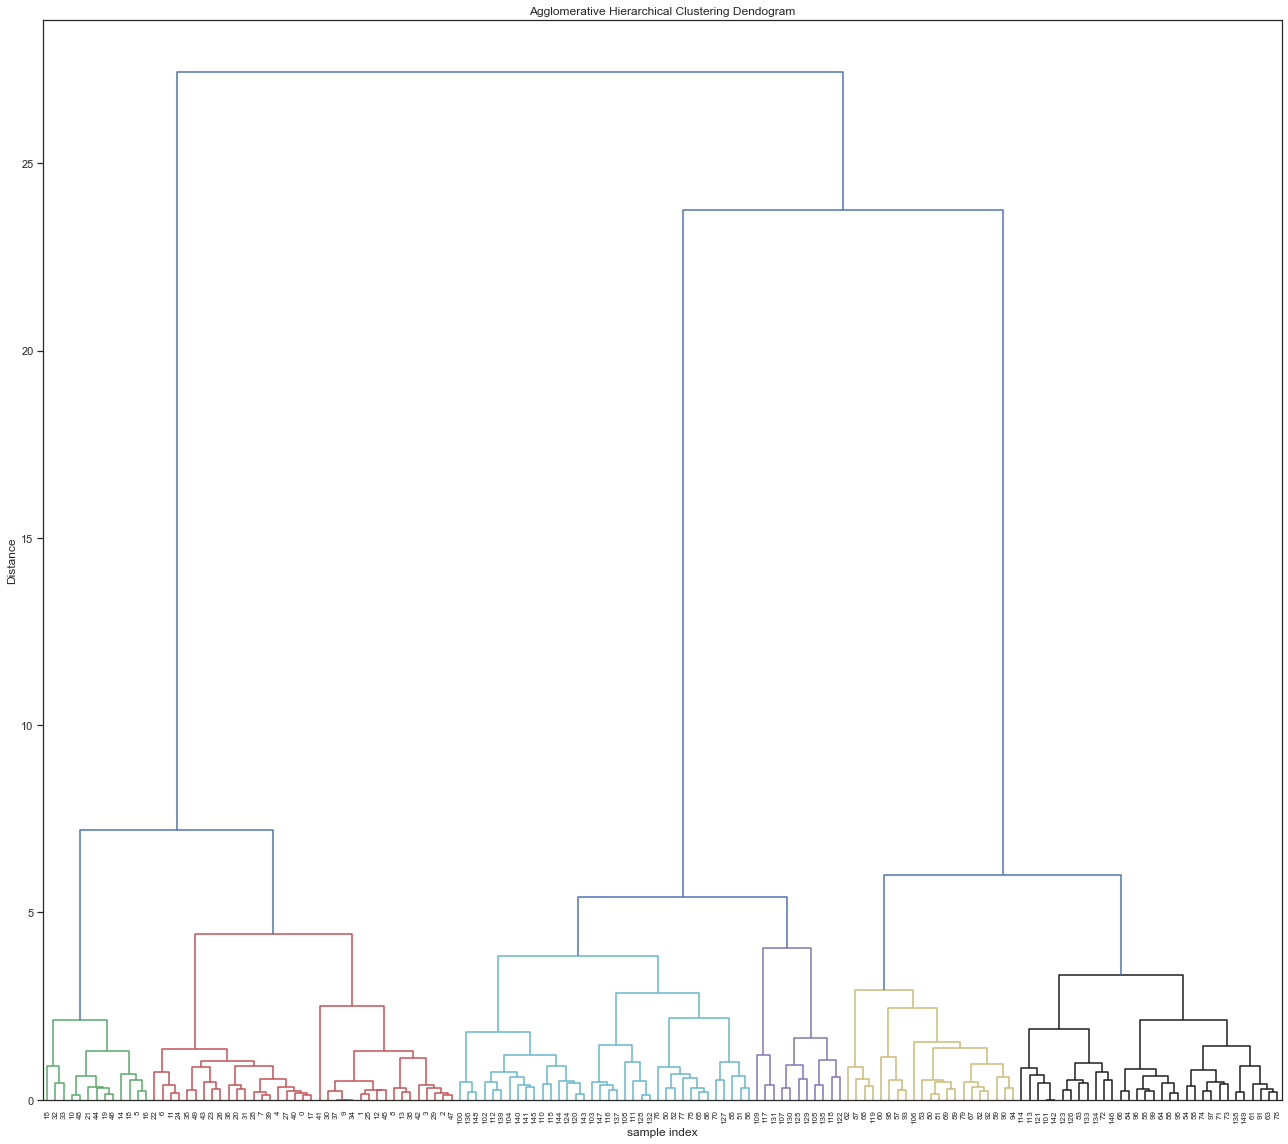

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,color_threshold=5,
           leaf_font_size=8)
plt.tight_layout()